In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path="csv2/"

# Load the data
d_in = pd.read_csv(f'{path}/incoming_events.csv', dtype={'timestamp': 'int64', 'event_time': 'int64'})
d_out = pd.read_csv(f'{path}/outgoing_events.csv', dtype={'timestamp': 'int64', 'event_time': 'int64'})

# Add discriminator column
d_in['discriminator'] = 'output'
d_out['discriminator'] = 'input'

# Concatenate the datasets
df = pd.concat([d_in, d_out], ignore_index=True)
df.sort_values(by=['event_time'], kind="stable", inplace=True)
print(df.describe())

print(np.quantile(np.diff(df["event_time"], 1), [0.5, 0.75, 0.9, 0.99, 0.999, 0.9999, 0.999999, 1]))

df.drop(df[df["event_time"].quantile(0.2) - df["event_time"] > 3000].index, inplace=True) # Tolgo gli elementi all'inzio perché sono un po' sballati

print(np.quantile(np.diff(df["event_time"], 1), [0.5, 0.75, 0.9, 0.99, 0.999, 0.9999, 0.999999, 1]))


df["timestamp"] = df["timestamp"] - df["timestamp"].min()
df["event_time"] = df["event_time"] - df["event_time"].min()

print((df["event_time"].quantile(0.5) - df["event_time"].min()) / 1000)

# df["timestamp"] = df["timestamp"] / df["timestamp"].max()
# df["event_time"] = df["event_time"] / df["event_time"].max()

# df = df.groupby(['discriminator', 'event_time']).mean().reset_index()


         event_time     timestamp
count  1.003200e+04  1.003200e+04
mean   1.734278e+12  1.734277e+18
std    2.892538e+05  2.078899e+10
min    1.734277e+12  1.734277e+18
25%    1.734277e+12  1.734277e+18
50%    1.734278e+12  1.734277e+18
75%    1.734278e+12  1.734277e+18
max    1.734278e+12  1.734277e+18
[100. 100. 100. 100. 100. 100. 100. 100.]
[100. 100. 100. 100. 100. 100. 100. 100.]
402.7


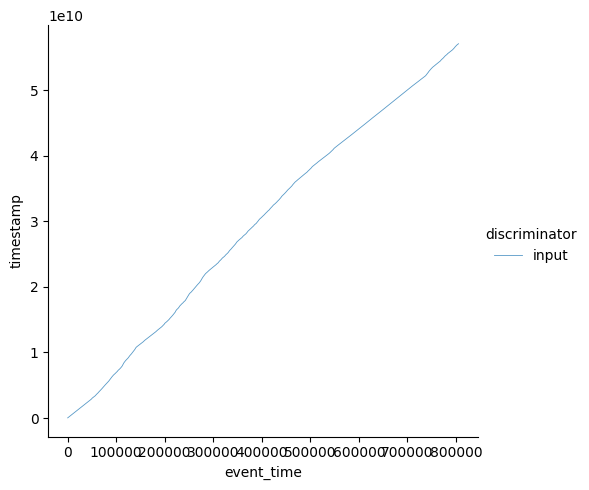

In [8]:
sns.relplot(data=df, x="event_time", y="timestamp", hue="discriminator", kind="line", alpha=0.75, linewidth=0.6)
plt.show()

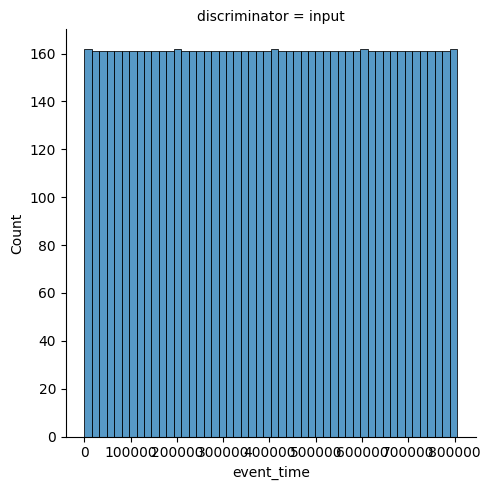

In [9]:
sns.displot(data=df, x="event_time", col="discriminator", kind="hist", bins=50, facet_kws={"sharex": False, "sharey": False})
plt.show()

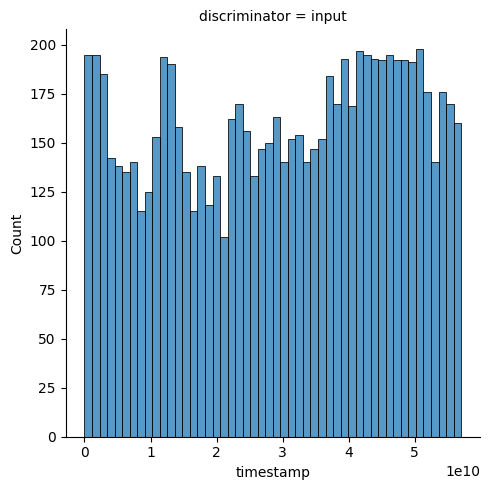

In [4]:
sns.displot(data=df, x="timestamp", col="discriminator", kind="hist", bins=50, facet_kws={"sharex": False, "sharey": False})
plt.show()

In [5]:
df["real_time_s"] = df["timestamp"] / 1e9
df["event_time_s"] = df["event_time"] / 1e3

dout = df[df['discriminator'] == 'output'][['event_time_s', 'real_time_s']]
din = df[df['discriminator'] == 'input'][['event_time_s', 'real_time_s']]

# For interpolation to be meaningful we need to have only one y for each x
dout = dout.groupby(['event_time_s']).mean().reset_index()
din = din.groupby(['event_time_s']).mean().reset_index()

# IDK why, but the first two elements are bad
dout = dout[2:]
din = din[2:]


rt_in_interp = np.interp(dout['event_time_s'], din['event_time_s'], din['real_time_s'])
rt_out_interp = np.interp(din['event_time_s'], dout['event_time_s'], dout['real_time_s'])

data = pd.DataFrame({'event_time_s': dout['event_time_s'], 'real_delta_s': dout['real_time_s'] - rt_in_interp})
sns.relplot(data=data, x="event_time_s", y="real_delta_s", kind="scatter", alpha=0.2, linewidth=0)
sns.displot(data=data, x="real_delta_s", kind="hist", bins=50)

ValueError: array of sample points is empty

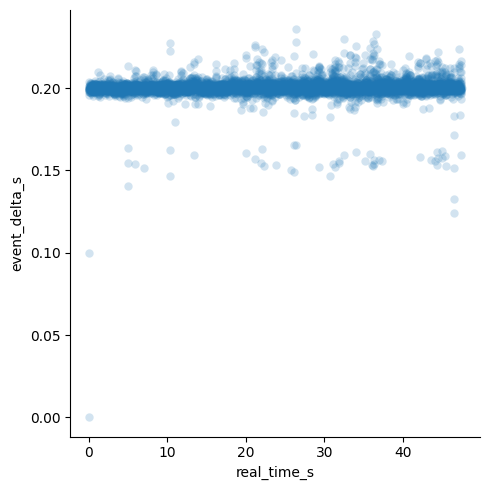

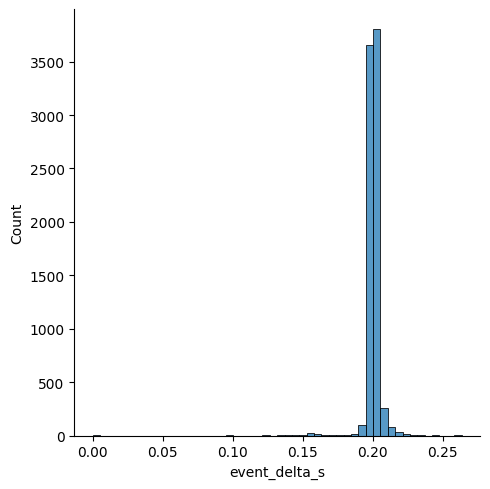

In [266]:
dout_et_interp = np.interp(din["real_time_s"], dout["real_time_s"], dout["event_time_s"])
data = pd.DataFrame({'real_time_s': dout['real_time_s'], 'event_delta_s': din['event_time_s'] - dout_et_interp})
sns.relplot(data=data, x="real_time_s", y="event_delta_s", kind="scatter", alpha=0.2, linewidth=0)
sns.displot(data=data, x="event_delta_s", kind="hist", bins=50)

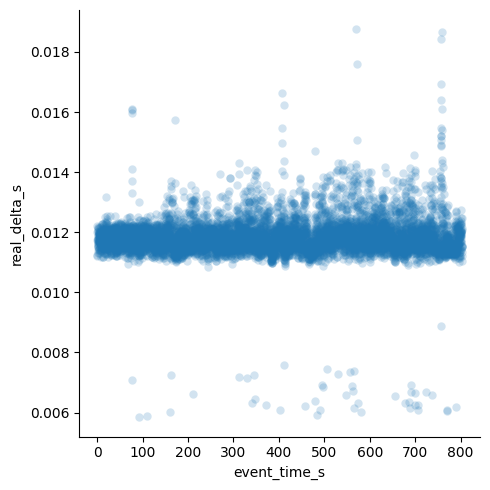

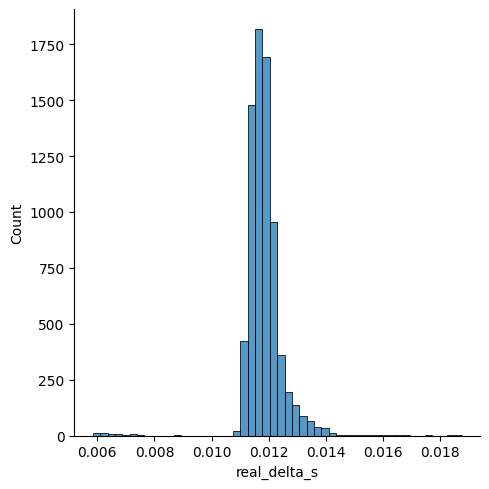

In [ ]:
df["real_time_s"] = df["timestamp"] / 1e9
df["event_time_s"] = df["event_time"] / 1e3

dout = df[df['discriminator'] == 'output'][['event_time_s', 'real_time_s']]
din = df[df['discriminator'] == 'input'][['event_time_s', 'real_time_s']]

# For interpolation to be meaningful we need to have only one y for each x
dout = dout.groupby(['event_time_s']).mean().reset_index()
din = din.groupby(['event_time_s']).mean().reset_index()

# IDK why, but the first two elements are bad
dout = dout[2:]
din = din[2:]


rt_in_interp = np.interp(dout['event_time_s'], din['event_time_s'], din['real_time_s'])
rt_out_interp = np.interp(din['event_time_s'], dout['event_time_s'], dout['real_time_s'])

data = pd.DataFrame({'event_time_s': dout['event_time_s'], 'real_delta_s': dout['real_time_s'] - rt_in_interp})
sns.relplot(data=data, x="event_time_s", y="real_delta_s", kind="scatter", alpha=0.2, linewidth=0)
sns.displot(data=data, x="real_delta_s", kind="hist", bins=50)